# Pandas Library

Pandas is a library for reading data files. (You Consider them excel tables) For instance,
you can read hourly weather data, load data and ... with it. 

## Installation

You can install pandas using the following command:

```bash
pip install pandas
```

## Usage

In [77]:
import pandas as pd
import numpy as np

In [78]:
INPUT_PATH = "../data/pgvis.csv"
OUTPUT_PATH = "../data/pgvis_out.csv"

In [79]:
### Reading a file #########################
# data collection is usually referred to as "Data Frame" in pandas
# and usually has variable name "df"
df = pd.read_csv(INPUT_PATH)
df

,time,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
0,20181231:2349,0.00,0.00,0.00,0.00,10.84,2.41,0.0
1,20190101:0049,0.00,0.00,0.00,0.00,10.23,1.86,0.0
2,20190101:0149,0.00,0.00,0.00,0.00,10.43,1.38,0.0
3,20190101:0249,0.00,0.00,0.00,-1.70,9.94,1.45,0.0
4,20190101:0349,296.65,157.66,2.17,9.88,10.46,1.38,0.0
...,...,...,...,...,...,...,...,...
17539,20201231:1849,0.00,0.00,0.00,0.00,5.85,3.86,0.0
17540,20201231:1949,0.00,0.00,0.00,0.00,5.21,3.66,0.0
17541,20201231:2049,0.00,0.00,0.00,0.00,4.68,3.59,0.0
17542,20201231:2149,0.00,0.00,0.00,0.00,4.21,3.52,0.0


In [80]:
### Knowing the data #######################
df.describe()

,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.0
mean,177.281800,84.356153,2.790339,17.994868,22.633095,3.839764,0.0
std,275.007357,108.205791,3.878747,23.612616,9.772147,2.073667,0.0
min,0.000000,0.000000,0.000000,-2.950000,-0.020000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,14.497500,2.210000,0.0
50%,0.000000,0.000000,0.000000,0.000000,22.730000,3.450000,0.0
75%,338.497500,180.322500,5.760000,35.672500,30.390000,5.170000,0.0
max,967.600000,484.440000,12.590000,84.440000,44.890000,11.860000,0.0


In [81]:
### Selecting Specific Columns #############
columns_list = ["time", "WS10m"]
df[columns_list]

# or in a single line:
df[["time", "WS10m"]]

,time,WS10m
0,20181231:2349,2.41
1,20190101:0049,1.86
2,20190101:0149,1.38
3,20190101:0249,1.45
4,20190101:0349,1.38
...,...,...
17539,20201231:1849,3.86
17540,20201231:1949,3.66
17541,20201231:2049,3.59
17542,20201231:2149,3.52


In [82]:
### Filtering The data #####################
# Like Numpy, comparison operator will give you a boolean list

df["WS10m"] > 4

0        False
1        False
2        False
3        False
4        False
         ...  
17539    False
17540    False
17541    False
17542    False
17543    False
Name: WS10m, Length: 17544, dtype: bool

In [83]:
# You can use the list as a filter for filtering your data frame
# For example, think we want to know what percent of hours is wind speed more than 4m/s
# We can do the following:

df_filtered = df[df["WS10m"] > 4]
df_filtered

,time,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
30,20190102:0549,226.05,288.10,4.60,29.31,16.19,4.34,0.0
31,20190102:0649,765.57,181.89,7.40,35.80,17.75,4.69,0.0
32,20190102:0749,682.43,216.22,7.49,38.90,18.90,5.24,0.0
33,20190102:0849,727.55,151.76,7.45,38.00,19.60,5.52,0.0
34,20190102:0949,367.95,222.10,5.42,33.30,19.77,5.66,0.0
...,...,...,...,...,...,...,...,...
17534,20201231:1349,0.00,0.00,0.00,0.00,9.50,5.66,0.0
17535,20201231:1449,0.00,0.00,0.00,0.00,8.56,5.31,0.0
17536,20201231:1549,0.00,0.00,0.00,0.00,7.81,4.69,0.0
17537,20201231:1649,0.00,0.00,0.00,0.00,7.15,4.48,0.0


In [84]:
# around 40% of the times, wind speed is more than 4m/s
len(df_filtered) / len(df)

0.4058367533059736

> **IMPORTANT NOTE:** Like NumPy you can combine different filters with `&` and `|` binary operators.

In [85]:
### Renaming Columns #######################
df.rename(
    columns={
        "Gb(i)": "direct_irradiance",
        "Gd(i)": "sky_diffused",
        "Gr(i)": "ground_diffuse",
    }
)
df

,time,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
0,20181231:2349,0.00,0.00,0.00,0.00,10.84,2.41,0.0
1,20190101:0049,0.00,0.00,0.00,0.00,10.23,1.86,0.0
2,20190101:0149,0.00,0.00,0.00,0.00,10.43,1.38,0.0
3,20190101:0249,0.00,0.00,0.00,-1.70,9.94,1.45,0.0
4,20190101:0349,296.65,157.66,2.17,9.88,10.46,1.38,0.0
...,...,...,...,...,...,...,...,...
17539,20201231:1849,0.00,0.00,0.00,0.00,5.85,3.86,0.0
17540,20201231:1949,0.00,0.00,0.00,0.00,5.21,3.66,0.0
17541,20201231:2049,0.00,0.00,0.00,0.00,4.68,3.59,0.0
17542,20201231:2149,0.00,0.00,0.00,0.00,4.21,3.52,0.0


> **IMPORTANT NOTE**: most operations in pandas **DO NOT HAPPEN IN PLACE.** Instead they create
> a copy of the data frame. As you can see in the above code, df is not changed even after renaming
> the columns. To make the change happen, you must reassign the variable (or use the `inplace` parameter):

In [86]:
df = df.rename(
    columns={
        "Gb(i)": "direct_irradiance",
        "Gd(i)": "sky_diffused",
        "Gr(i)": "ground_diffused",
    }
)
df

,time,direct_irradiance,sky_diffused,ground_diffused,H_sun,T2m,WS10m,Int
0,20181231:2349,0.00,0.00,0.00,0.00,10.84,2.41,0.0
1,20190101:0049,0.00,0.00,0.00,0.00,10.23,1.86,0.0
2,20190101:0149,0.00,0.00,0.00,0.00,10.43,1.38,0.0
3,20190101:0249,0.00,0.00,0.00,-1.70,9.94,1.45,0.0
4,20190101:0349,296.65,157.66,2.17,9.88,10.46,1.38,0.0
...,...,...,...,...,...,...,...,...
17539,20201231:1849,0.00,0.00,0.00,0.00,5.85,3.86,0.0
17540,20201231:1949,0.00,0.00,0.00,0.00,5.21,3.66,0.0
17541,20201231:2049,0.00,0.00,0.00,0.00,4.68,3.59,0.0
17542,20201231:2149,0.00,0.00,0.00,0.00,4.21,3.52,0.0


In [87]:
### Creating New Columns ###################

df = df.assign(grid_price=np.random.random(len(df)) * 100)

df

,time,direct_irradiance,sky_diffused,ground_diffused,H_sun,T2m,WS10m,Int,grid_price
0,20181231:2349,0.00,0.00,0.00,0.00,10.84,2.41,0.0,73.112407
1,20190101:0049,0.00,0.00,0.00,0.00,10.23,1.86,0.0,44.552163
2,20190101:0149,0.00,0.00,0.00,0.00,10.43,1.38,0.0,26.148748
3,20190101:0249,0.00,0.00,0.00,-1.70,9.94,1.45,0.0,64.409426
4,20190101:0349,296.65,157.66,2.17,9.88,10.46,1.38,0.0,90.215407
...,...,...,...,...,...,...,...,...,...
17539,20201231:1849,0.00,0.00,0.00,0.00,5.85,3.86,0.0,49.680565
17540,20201231:1949,0.00,0.00,0.00,0.00,5.21,3.66,0.0,36.418818
17541,20201231:2049,0.00,0.00,0.00,0.00,4.68,3.59,0.0,64.028807
17542,20201231:2149,0.00,0.00,0.00,0.00,4.21,3.52,0.0,99.230270


In [88]:
# based on previous columns
df = df.assign(diffuse_iradiance=df["sky_diffused"] + df["ground_diffused"])
df

,time,direct_irradiance,sky_diffused,ground_diffused,H_sun,T2m,WS10m,Int,grid_price,diffuse_iradiance
0,20181231:2349,0.00,0.00,0.00,0.00,10.84,2.41,0.0,73.112407,0.00
1,20190101:0049,0.00,0.00,0.00,0.00,10.23,1.86,0.0,44.552163,0.00
2,20190101:0149,0.00,0.00,0.00,0.00,10.43,1.38,0.0,26.148748,0.00
3,20190101:0249,0.00,0.00,0.00,-1.70,9.94,1.45,0.0,64.409426,0.00
4,20190101:0349,296.65,157.66,2.17,9.88,10.46,1.38,0.0,90.215407,159.83
...,...,...,...,...,...,...,...,...,...,...
17539,20201231:1849,0.00,0.00,0.00,0.00,5.85,3.86,0.0,49.680565,0.00
17540,20201231:1949,0.00,0.00,0.00,0.00,5.21,3.66,0.0,36.418818,0.00
17541,20201231:2049,0.00,0.00,0.00,0.00,4.68,3.59,0.0,64.028807,0.00
17542,20201231:2149,0.00,0.00,0.00,0.00,4.21,3.52,0.0,99.230270,0.00


In [89]:
### Working with dates #####################
# By default dates will be considered a string in pandas
# This can a problem when doing tasks like plotting, resampling and ...
# to parse dates you can do the following:

# NOTE: the `format` parameter is not magic!
# It is a formatting language to specify the format of the date/time string
# For example: %Y means year, %m means month, %d means day and...
# You can see all of them in https://docs.python.org/3/library/time.html#time.strftime
df = df.assign(time=pd.to_datetime(df["time"], format="%Y%m%d:%H%M"))
df


,time,direct_irradiance,sky_diffused,ground_diffused,H_sun,T2m,WS10m,Int,grid_price,diffuse_iradiance
0,2018-12-31 23:49:00,0.00,0.00,0.00,0.00,10.84,2.41,0.0,73.112407,0.00
1,2019-01-01 00:49:00,0.00,0.00,0.00,0.00,10.23,1.86,0.0,44.552163,0.00
2,2019-01-01 01:49:00,0.00,0.00,0.00,0.00,10.43,1.38,0.0,26.148748,0.00
3,2019-01-01 02:49:00,0.00,0.00,0.00,-1.70,9.94,1.45,0.0,64.409426,0.00
4,2019-01-01 03:49:00,296.65,157.66,2.17,9.88,10.46,1.38,0.0,90.215407,159.83
...,...,...,...,...,...,...,...,...,...,...
17539,2020-12-31 18:49:00,0.00,0.00,0.00,0.00,5.85,3.86,0.0,49.680565,0.00
17540,2020-12-31 19:49:00,0.00,0.00,0.00,0.00,5.21,3.66,0.0,36.418818,0.00
17541,2020-12-31 20:49:00,0.00,0.00,0.00,0.00,4.68,3.59,0.0,64.028807,0.00
17542,2020-12-31 21:49:00,0.00,0.00,0.00,0.00,4.21,3.52,0.0,99.230270,0.00


In [90]:
### Setting Indexes ########################
# Indexes are the pivotal points of the tables.
# Many of the functionalities of pandas are based on the index column
# For our use cases it usually the date/time
# We will discuss more on that below
df = df.set_index("time")
df

,direct_irradiance,sky_diffused,ground_diffused,H_sun,T2m,WS10m,Int,grid_price,diffuse_iradiance
time,,,,,,,,,
2018-12-31 23:49:00,0.00,0.00,0.00,0.00,10.84,2.41,0.0,73.112407,0.00
2019-01-01 00:49:00,0.00,0.00,0.00,0.00,10.23,1.86,0.0,44.552163,0.00
2019-01-01 01:49:00,0.00,0.00,0.00,0.00,10.43,1.38,0.0,26.148748,0.00
2019-01-01 02:49:00,0.00,0.00,0.00,-1.70,9.94,1.45,0.0,64.409426,0.00
2019-01-01 03:49:00,296.65,157.66,2.17,9.88,10.46,1.38,0.0,90.215407,159.83
...,...,...,...,...,...,...,...,...,...
2020-12-31 18:49:00,0.00,0.00,0.00,0.00,5.85,3.86,0.0,49.680565,0.00
2020-12-31 19:49:00,0.00,0.00,0.00,0.00,5.21,3.66,0.0,36.418818,0.00
2020-12-31 20:49:00,0.00,0.00,0.00,0.00,4.68,3.59,0.0,64.028807,0.00


In [91]:
### Writing The Output ###################
df.to_csv(OUTPUT_PATH)

In [92]:
### Setting Index and Parsing on Read ####
df = pd.read_csv(
    INPUT_PATH, parse_dates=["time"], index_col="time", date_format="%Y%m%d:%H%M"
)
df

,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,
2018-12-31 23:49:00,0.00,0.00,0.00,0.00,10.84,2.41,0.0
2019-01-01 00:49:00,0.00,0.00,0.00,0.00,10.23,1.86,0.0
2019-01-01 01:49:00,0.00,0.00,0.00,0.00,10.43,1.38,0.0
2019-01-01 02:49:00,0.00,0.00,0.00,-1.70,9.94,1.45,0.0
2019-01-01 03:49:00,296.65,157.66,2.17,9.88,10.46,1.38,0.0
...,...,...,...,...,...,...,...
2020-12-31 18:49:00,0.00,0.00,0.00,0.00,5.85,3.86,0.0
2020-12-31 19:49:00,0.00,0.00,0.00,0.00,5.21,3.66,0.0
2020-12-31 20:49:00,0.00,0.00,0.00,0.00,4.68,3.59,0.0


In [93]:
### Resampling #############################
# For example, think we have hourly data and want to convert it to monthly.
# Here is how can do this:
# `ME` here is for month
# `H` for hourly
# `D` is for day
# `W` for weekly
# `Q` for quarterly
# `Y` for yearly
df.resample("ME").mean()

,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,10.840000,2.410000,0.0
2019-01-31,144.858871,64.332702,1.770067,11.081667,13.363804,3.855645,0.0
2019-02-28,121.476310,74.367247,1.865446,13.786652,11.832991,4.591845,0.0
2019-03-31,151.500699,84.525403,2.456962,17.470726,15.104140,3.685968,0.0
2019-04-30,171.327194,96.592583,3.100556,21.347778,22.679014,3.843278,0.0
2019-05-31,172.656841,104.146976,3.392903,23.764852,28.333495,2.962621,0.0
2019-06-30,193.101625,98.622569,3.762681,24.846014,33.012486,4.317611,0.0
2019-07-31,172.111855,104.327204,3.487231,24.302728,34.223253,3.469597,0.0
2019-08-31,196.632003,97.565121,3.487621,22.496828,31.951707,4.834798,0.0


<Axes: xlabel='time'>

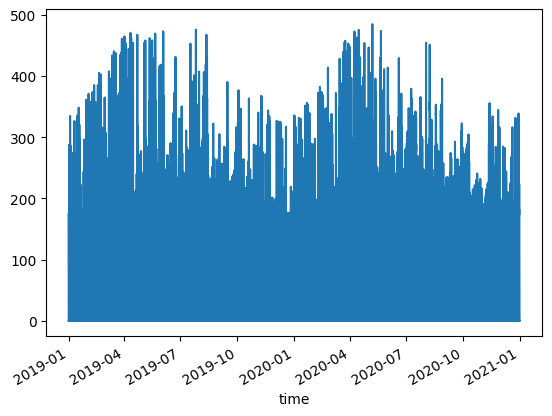

In [94]:
### Plotting ###############################
# This function requires matplotlib to be installed
# We will discuss it in the next chapter
df["Gd(i)"].plot()

<Axes: xlabel='time'>

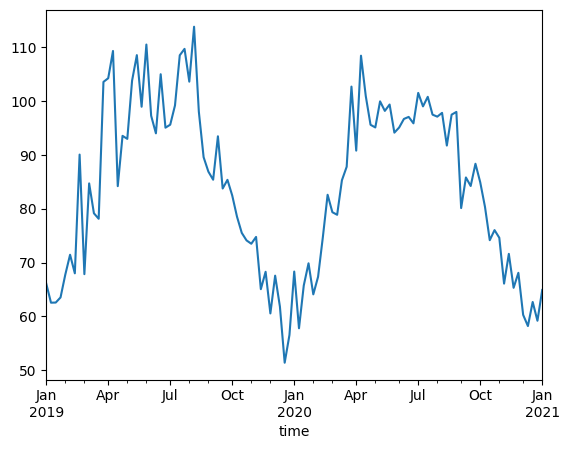

In [95]:
# The plot is noisy and barely readable, let's resample it:
df["Gd(i)"].resample("W").mean().plot()

There are two important points in the plot:
1. `x` axis is the time (because we set it as index)
1. Look at the month names as matplotlib understands dates and renamed the months